In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Define grid

In [2]:
rho_arr = np.linspace(0,3.0,21)
theta_arr = np.linspace(0, np.pi, 9)
phi_arr = np.linspace(0, 2*np.pi, 21)

## averaging depth
z0 = 1.5

In [3]:
R = 2.0

def P_func(rho,theta,phi):
    return 1.0 * (rho < R)

P_arr = P_func(*np.meshgrid(rho_arr, theta_arr, phi_arr, indexing='ij', sparse=False))

# Interpolation for discrete data

In [4]:
from scipy.interpolate import RegularGridInterpolator
P_func_interp = RegularGridInterpolator((rho_arr, theta_arr, phi_arr), P_arr)

# Evaluate averaged map

In [5]:
## reduce the radial coordinate to make space for interpolation
reduced_rho_arr = rho_arr[rho_arr < np.sqrt(rho_arr[-1]**2 - z0**2)]

Rho_arr, Phi_arr = np.meshgrid(reduced_rho_arr, phi_arr)

In [6]:
## analytical averaged map
Z_rho0 = z0 \
    + (np.sqrt(np.abs(R*R-Rho_arr*Rho_arr))-z0) * (Rho_arr > np.sqrt(R*R-z0*z0)) \
    + (0 - np.sqrt(np.abs(R*R-Rho_arr*Rho_arr))) * (Rho_arr > R)
P_bar_ana_arr = 2.0 * Z_rho0 / (2.0 * z0)

## Numerically averaged map
from tdse.coordinate import P_bar_vec
P_bar_arr = P_bar_vec(Rho_arr, Phi_arr, P_func_interp, z0=z0)

## Evaluate difference
P_bar_diff_arr = P_bar_ana_arr - P_bar_arr

# Plot the averaged map

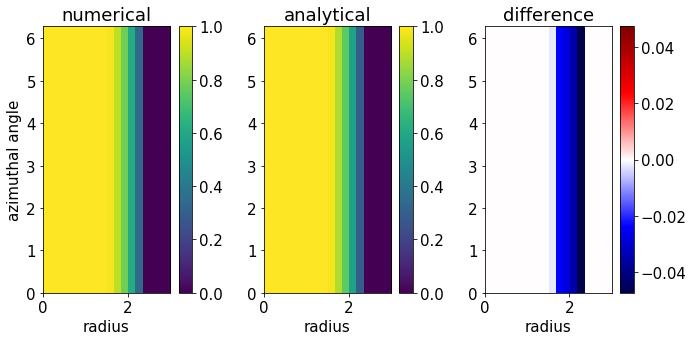

In [7]:
rcParams['font.size'] = 15

extent = (0.0, 3.0, 0.0, 2.0*np.pi)

fig, (ax1, ax2, axdiff) = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
pcm1 = ax1.imshow(P_bar_arr, extent=extent)
pcm2 = ax2.imshow(P_bar_ana_arr, extent=extent)

vmax = np.abs(P_bar_diff_arr).max()
vmin = -vmax
pcmdiff = axdiff.imshow(P_bar_diff_arr, extent=extent, cmap='seismic', vmax=vmax, vmin=vmin)

ax1.set_title("numerical"), ax2.set_title("analytical"), axdiff.set_title("difference")
ax1.set_xlabel("radius"), ax2.set_xlabel("radius"), axdiff.set_xlabel("radius")
ax1.set_ylabel("azimuthal angle")

fig.colorbar(pcm1, ax=ax1)
fig.colorbar(pcm2, ax=ax2)
fig.colorbar(pcmdiff, ax=axdiff)

fig.tight_layout()
# fig.savefig("comparison-for-radial-step-P_func.png")